# libraries #

In [415]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, roc_curve, RocCurveDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
import pickle  # For saving the model
import joblib # Alternative for saving model
import numpy as np


# Reading dataset #

In [416]:
# Load the dataset
df = pd.read_csv('HarishCCChurn.csv')

In [417]:
# Description about dataset
df.describe(include='all')


,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


In [418]:
# Types
df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [419]:
# null values
df.isna().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [420]:
# the shape of dataframe
df.shape

(3150, 14)

In [421]:
# 1. Data Understanding
print("Dataset shape:", df.shape)
print("Data types:\n", df.dtypes)
print("Missing values:\n", df.isnull().sum())
print("Sample data:\n", df.head())

Dataset shape: (3150, 14)
Data types:
 Call  Failure                int64
Complains                    int64
Subscription  Length         int64
Charge  Amount               int64
Seconds of Use               int64
Frequency of use             int64
Frequency of SMS             int64
Distinct Called Numbers      int64
Age Group                    int64
Tariff Plan                  int64
Status                       int64
Age                          int64
Customer Value             float64
Churn                        int64
dtype: object
Missing values:
 Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64
Sample data:
    Call

In [422]:
# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   Call  Failure  Complains  Subscription  Length  Charge  Amount  \
0              8          0                    38               0   
1              0          0                    39               0   
2             10          0                    37               0   
3             10          0                    38               0   
4              3          0                    38               0   

   Seconds of Use  Frequency of use  Frequency of SMS  \
0            4370                71                 5   
1             318                 5                 7   
2            2453                60               359   
3            4198                66                 1   
4            2393                58                 2   

   Distinct Called Numbers  Age Group  Tariff Plan  Status  Age  \
0                       17          3            1       1   30   
1                        4          2            1       2   25   
2           

In [423]:
# the last rows
df.tail()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.98,0
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.21,0
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.32,0
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.64,0
3149,8,1,11,2,1792,25,7,9,3,1,1,30,100.68,1


In [424]:
# The information about dataset
# Check data types and missing values
print("\nData types and missing values:")
df.info()
print(df.isnull().sum())


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64

In [425]:
# Descriptive statistics
print("\nDescriptive statistics:")
print(df.describe())


Descriptive statistics:
       Call  Failure    Complains  Subscription  Length  Charge  Amount  \
count    3150.000000  3150.000000           3150.000000     3150.000000   
mean        7.627937     0.076508             32.541905        0.942857   
std         7.263886     0.265851              8.573482        1.521072   
min         0.000000     0.000000              3.000000        0.000000   
25%         1.000000     0.000000             30.000000        0.000000   
50%         6.000000     0.000000             35.000000        0.000000   
75%        12.000000     0.000000             38.000000        1.000000   
max        36.000000     1.000000             47.000000       10.000000   

       Seconds of Use  Frequency of use  Frequency of SMS  \
count     3150.000000       3150.000000       3150.000000   
mean      4472.459683         69.460635         73.174921   
std       4197.908687         57.413308        112.237560   
min          0.000000          0.000000          0.0000

In [426]:
#print(df.columns)
#df.columns = df.columns.str.strip().str.lower()  # Convert to lowercase and remove spaces
#columns_to_impute = [col.strip().lower() for col in columns_to_impute]  # Match formatting
#missing_cols = [col for col in columns_to_impute if col not in df.columns]
#if missing_cols:
#    print(f"Warning: The following columns are missing from df: {missing_cols}")
#existing_cols = [col for col in columns_to_impute if col in df.columns]
#df[existing_cols] = imputer.fit_transform(df[existing_cols])

In [427]:
#columns_to_impute = ['Call Failure', 'Complains', 'Subscription Length', 'Charge Amount', 'Seconds Of Use',
 #                    'Frequency Of Use', 'Frequency Of SMS', 'Distinct Called Numbers', 'Age', 'Customer Value']
#
#df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

In [428]:
# 3. Data Preparation

# Handle missing values (if any) - Imputation or removal.  This dataset has no missing values, so skipping this step.  If there were missing values:
#df['column_name'].fillna(df['column_name'].mean(), inplace=True)  # Example: Impute with mean
#imputer = SimpleImputer(strategy='mean')  # Replace missing values with the mean
#df[['Call Failure', 'Complains', 'Subscription Length', 'Charge Amount', 'Seconds of Use',
 #   'Frequency of use', 'Frequency of SMS', 'Distinct Called Numbers', 'Age', 'Customer Value']] = imputer.fit_transform(df[['Call Failure', 'Complains', 'Subscription Length', 'Charge Amount', 'Seconds of Use','Frequency of use', 'Frequency of SMS', 'Distinct Called Numbers', 'Age', 'Customer Value']])

In [429]:
# Encode Categorical features
# Using LabelEncoder for 'Status' and OneHotEncoder for others

label_encoder = LabelEncoder()
df['Status'] = label_encoder.fit_transform(df['Status']) # Converts to numerical 0,1,2

#For other categorical variables like 'Age Group' and 'Tariff Plan', OneHotEncoding is applied
df = pd.get_dummies(df, columns=['Age Group', 'Tariff Plan'], drop_first=True)


In [430]:
print(df.columns)
df.columns = df.columns.str.strip()

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Status', 'Age', 'Customer Value', 'Churn',
       'Age Group_2', 'Age Group_3', 'Age Group_4', 'Age Group_5',
       'Tariff Plan_2'],
      dtype='object')


In [431]:
numerical_cols = [col for col in numerical_cols if col in df.columns]
print(df.head())


   Call  Failure  Complains  Subscription  Length  Charge  Amount  \
0              8          0                    38               0   
1              0          0                    39               0   
2             10          0                    37               0   
3             10          0                    38               0   
4              3          0                    38               0   

   Seconds of Use  Frequency of use  Frequency of SMS  \
0            4370                71                 5   
1             318                 5                 7   
2            2453                60               359   
3            4198                66                 1   
4            2393                58                 2   

   Distinct Called Numbers  Status  Age  Customer Value  Churn  Age Group_2  \
0                       17       0   30         197.640      0        False   
1                        4       1   25          46.035      0         True   
2    

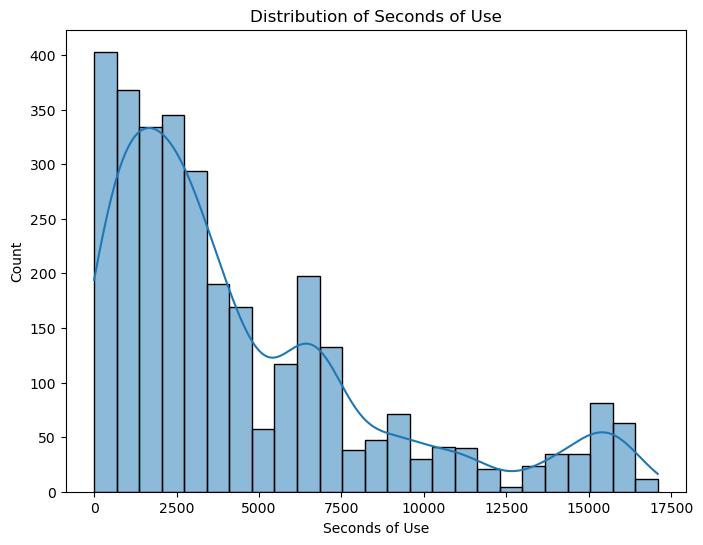

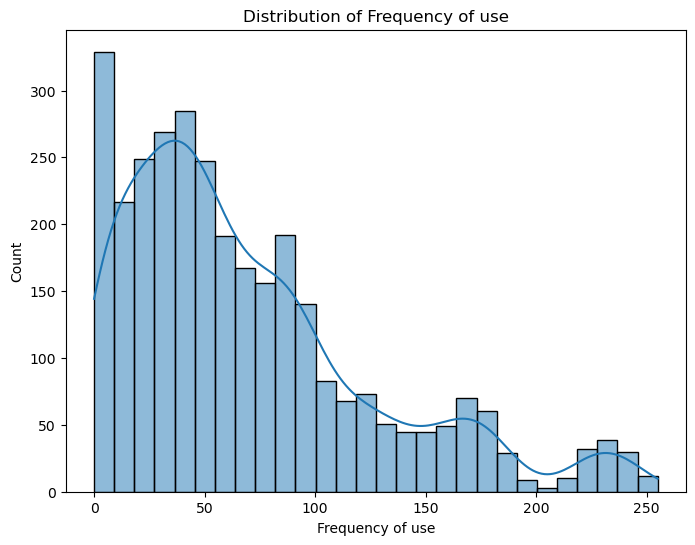

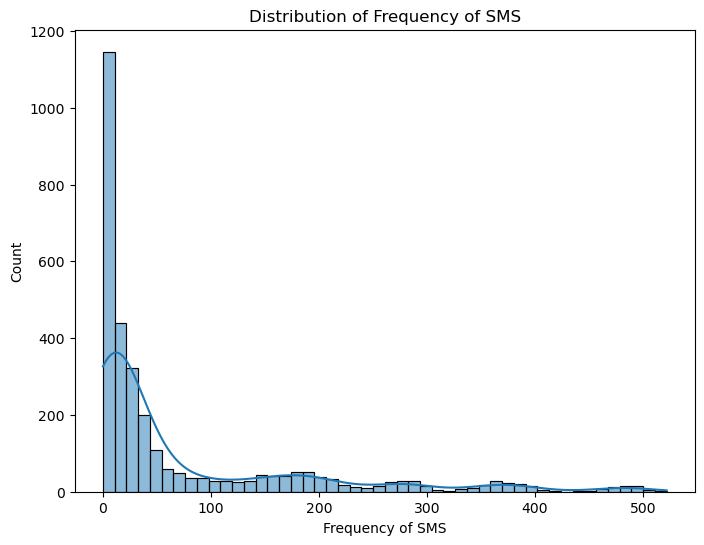

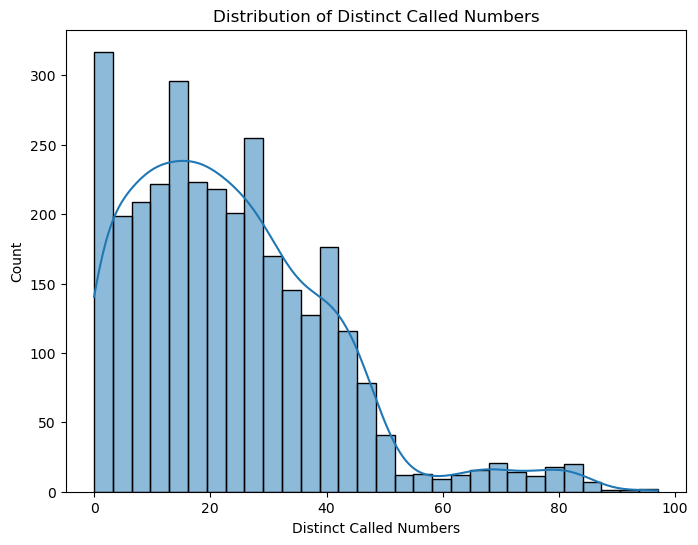

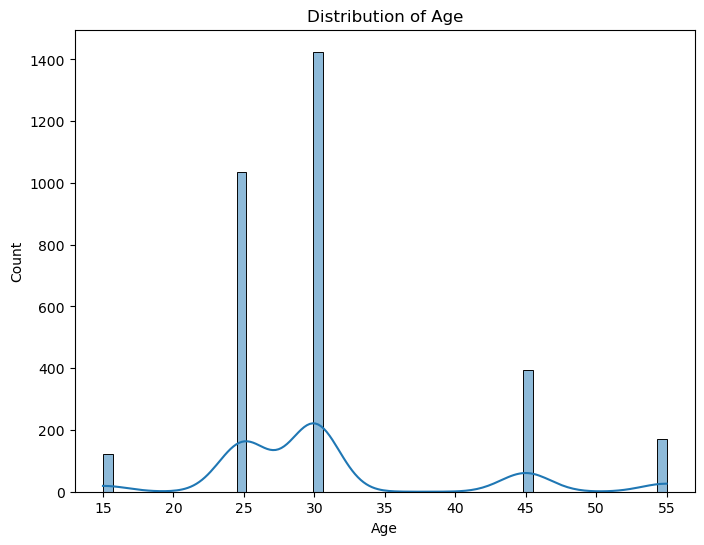

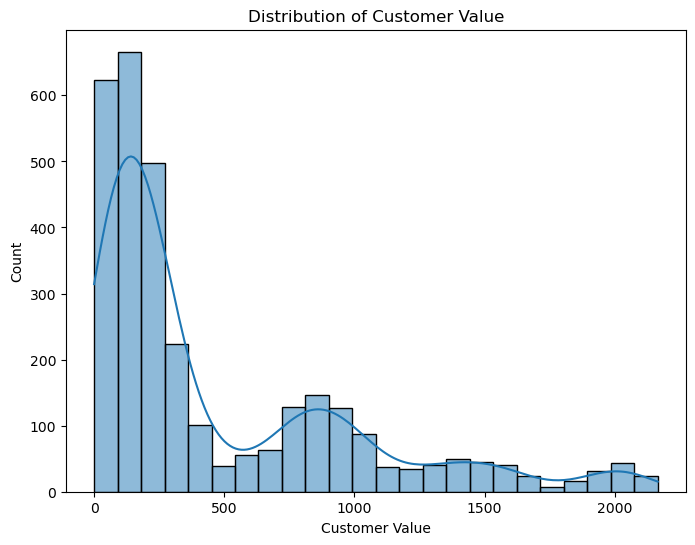

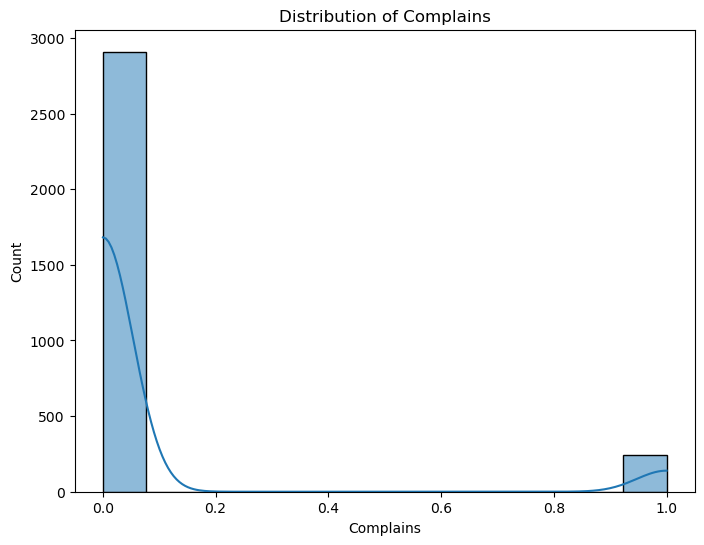

In [432]:
# 4. Exploratory Data Analysis (EDA)

# --- Univariate Analysis ---
# Histograms for numerical columns
for col in numerical_cols:
    if col in df.columns:
        plt.figure(figsize=(8, 6))
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()
    else:
        print(f"Warning: Column '{col}' not found in DataFrame.")

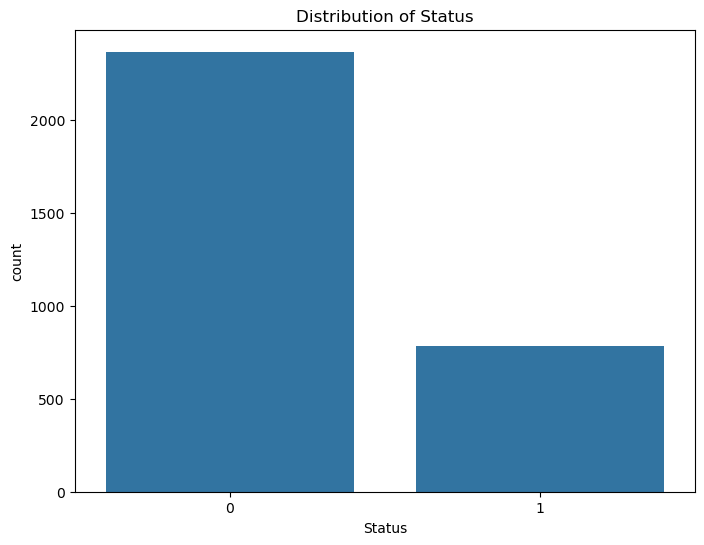

In [433]:
# Bar charts for categorical columns - after encoding
categorical_cols = ['Status'] # Only 'Status' left after one-hot encoding other categorical features.  Can add other binary columns created by OneHotEncoding if you want to visualize them.  Can add other binary columns created by OneHotEncoding if you want to visualize them.
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()

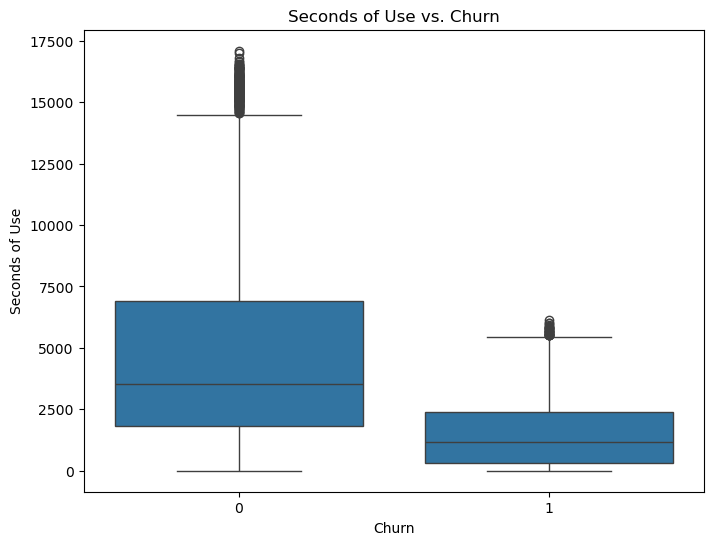

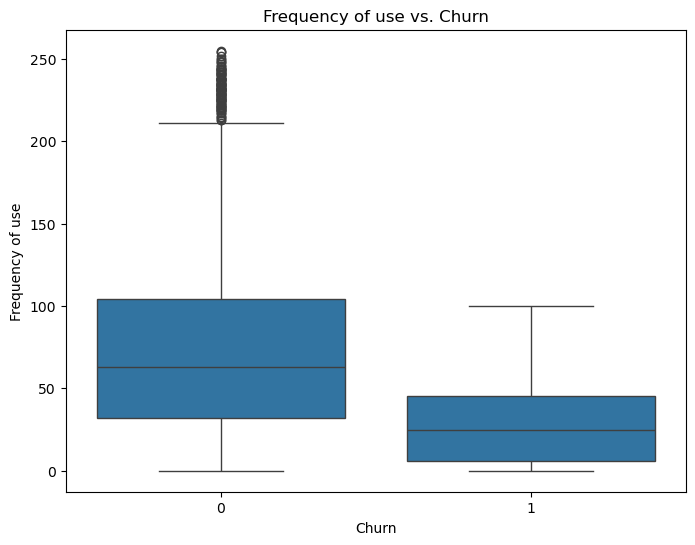

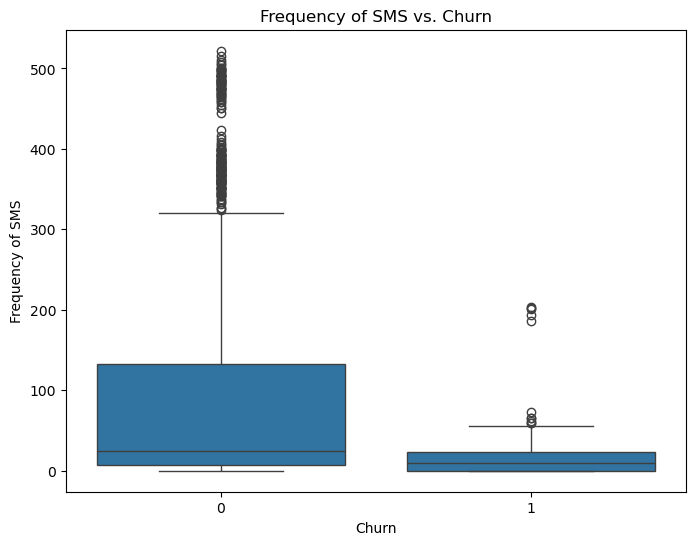

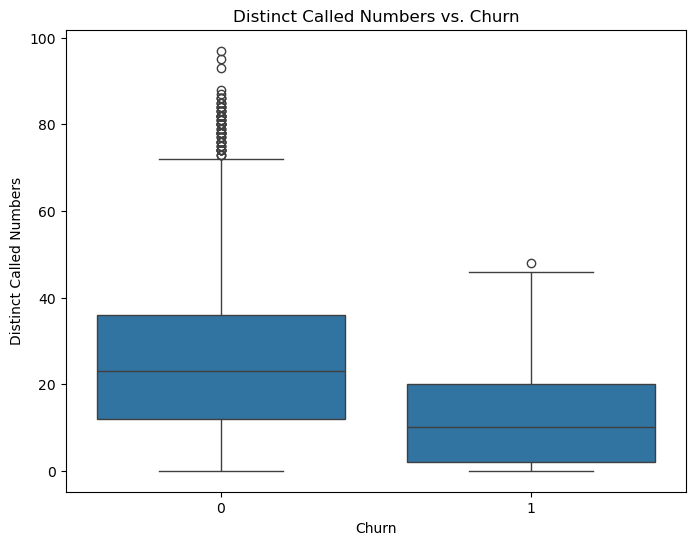

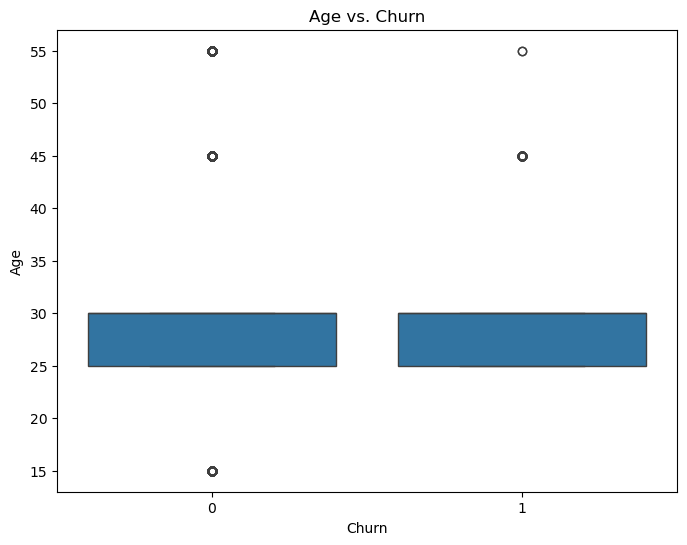

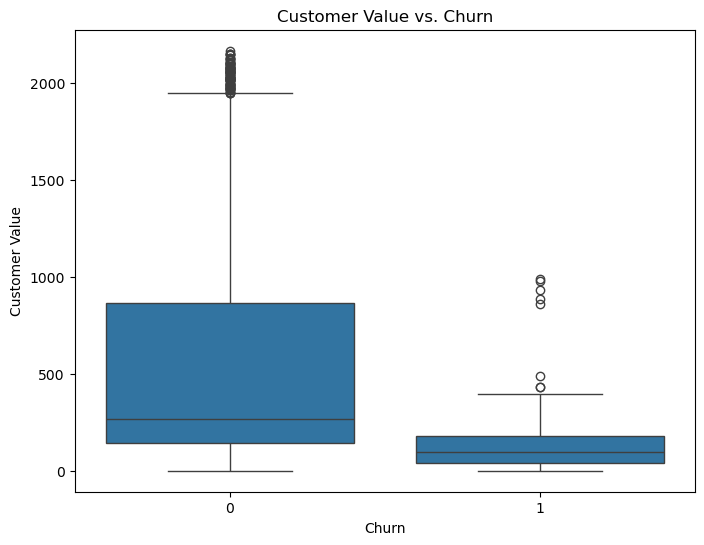

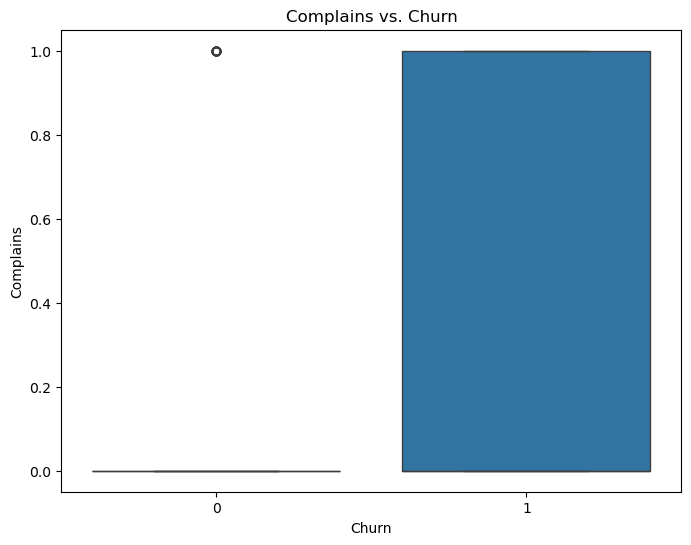

In [434]:
# --- Bivariate Analysis ---
# Box plots of numerical columns vs. Churn
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='Churn', y=col)
    plt.title(f'{col} vs. Churn')
    plt.show()

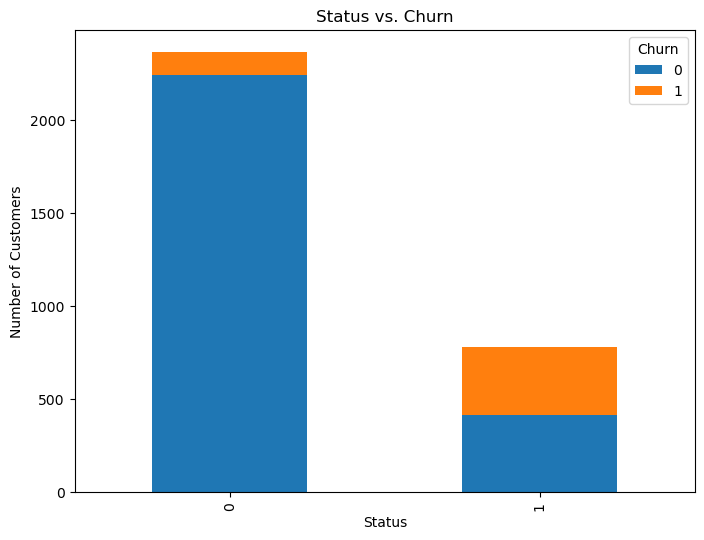

In [435]:
# Stacked bar charts of categorical columns vs. Churn - after encoding
for col in categorical_cols:
    cross_tab = pd.crosstab(df[col], df['Churn'])
    cross_tab.plot(kind='bar', stacked=True, figsize=(8, 6))
    plt.title(f'{col} vs. Churn')
    plt.xlabel(col)
    plt.ylabel('Number of Customers')
    plt.show()


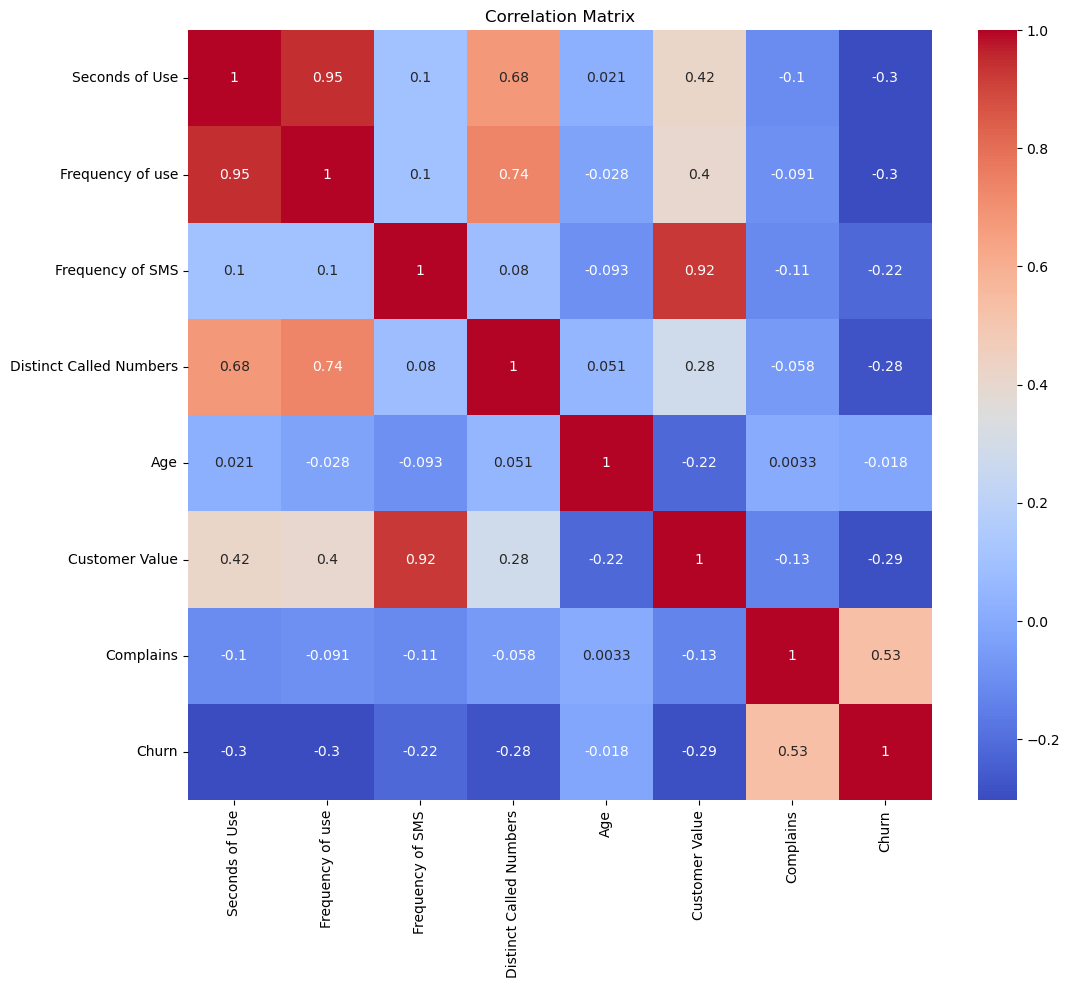

In [436]:
# --- Multivariate Analysis ---
# Correlation matrix
corr_matrix = df[numerical_cols + ['Churn']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [437]:
# 5. Modeling

# Prepare the data
X = df.drop('Churn', axis=1)
y = df['Churn']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [438]:
# Split data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (2520, 16)
Shape of X_test: (630, 16)
Shape of y_train: (2520,)
Shape of y_test: (630,)


In [439]:
import matplotlib.pyplot as plt
plt.show()

In [440]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, roc_curve

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    # Handle probability estimation
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_prob = model.decision_function(X_test)
    else:
        print(f"Model {model.__class__.__name__} does not support probability scores. Skipping ROC curve.")
        return  # ✅ This return is now correctly inside the function

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\n{model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC: {auc:.4f}")
    print(report)
    print("Confusion Matrix:\n", conf_matrix)

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})', color='blue')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.grid()
    plt.show()


In [441]:
# Basic Classifiers
# Helper functions to run and evaluate models and draw the ROC curve
def evaluate_model(model, X_test, y_test, model_name):
    """
    Evaluates a given model and prints performance metrics.
    Args:
        model: Trained sklearn model.
        X_test: Test features.
        y_test: Test target.
        model_name: Name of the model for display purposes.
    """
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\n{model_name}:")
    print(f"Accuracy: {accuracy}")
    print(f"AUC: {auc}")
    print(report)
    print("Confusion Matrix:\n", conf_matrix)

    # Plot ROC curve
    #RocCurveDisplay.from_estimator(model, X_test, y_test)
    #plt.title(f'ROC Curve - {model_name}')
    #plt.show()

    # Plot ROC curve explicitly
    #fpr, tpr, _ = roc_curve(y_test, y_prob)
    #plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
    #plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    #plt.xlabel('False Positive Rate')
    #plt.ylabel('True Positive Rate')
    #plt.title(f'ROC Curve - {model_name}')
    #plt.legend()
    #plt.show()

    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

def train_and_evaluate(model, param_grid, X_train, y_train, X_test, y_test, model_name):
    """
    Trains a model using GridSearchCV for hyperparameter tuning and evaluates it.

    Args:
        model: The sklearn model to train.
        param_grid: Hyperparameter grid for GridSearchCV.
        X_train: Training features.
        y_train: Training target.
        X_test: Test features.
        y_test: Test target.
        model_name: Name of the model for display purposes.
    Returns:
        The best estimator found by GridSearchCV.
    """
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    print(f"Best parameters for {model_name}:", grid_search.best_params_)
    evaluate_model(best_model, X_test, y_test, model_name)

    return best_model

In [442]:
# --- Define a list of classifiers to try with default hyperparameters ---
classifiers = {
    "Logistic Regression": (LogisticRegression(random_state=42, max_iter=1000), {'C': [0.1]}),  # Example hyperparameter
    "Random Forest": (RandomForestClassifier(random_state=42), {'n_estimators': [100]}),  # Example hyperparameter
    "Gradient Boosting": (GradientBoostingClassifier(random_state=42), {'n_estimators': [100]}),  # Example hyperparameter
    "SVM": (SVC(random_state=42, probability=True), {'C': [0.1], 'kernel': ['rbf']}), # Example hyperparameter
    "KNN": (KNeighborsClassifier(), {'n_neighbors': [5]}) # Example hyperparameter
}

Training and evaluating: Logistic Regression
Best parameters for Logistic Regression: {'C': 0.1}

Logistic Regression:
Accuracy: 0.8952380952380953
AUC: 0.9224638094694592
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       531
           1       0.84      0.41      0.55        99

    accuracy                           0.90       630
   macro avg       0.87      0.70      0.75       630
weighted avg       0.89      0.90      0.88       630

Confusion Matrix:
 [[523   8]
 [ 58  41]]


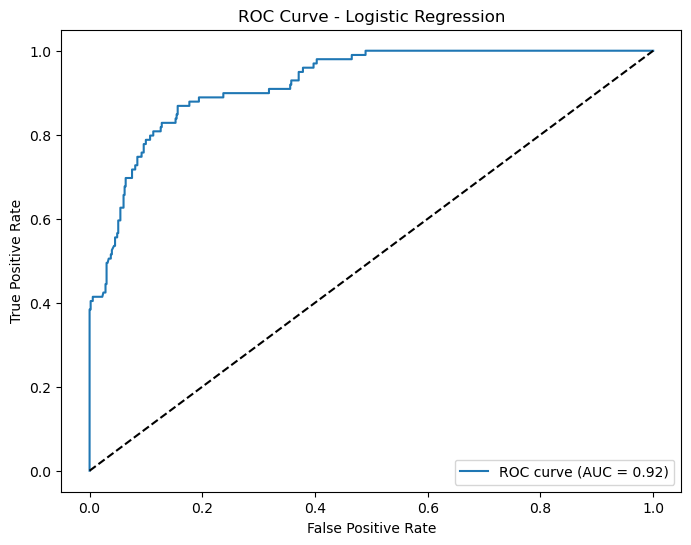

Training and evaluating: Random Forest
Best parameters for Random Forest: {'n_estimators': 100}

Random Forest:
Accuracy: 0.9619047619047619
AUC: 0.9876733436055471
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       531
           1       0.90      0.85      0.88        99

    accuracy                           0.96       630
   macro avg       0.94      0.92      0.93       630
weighted avg       0.96      0.96      0.96       630

Confusion Matrix:
 [[522   9]
 [ 15  84]]


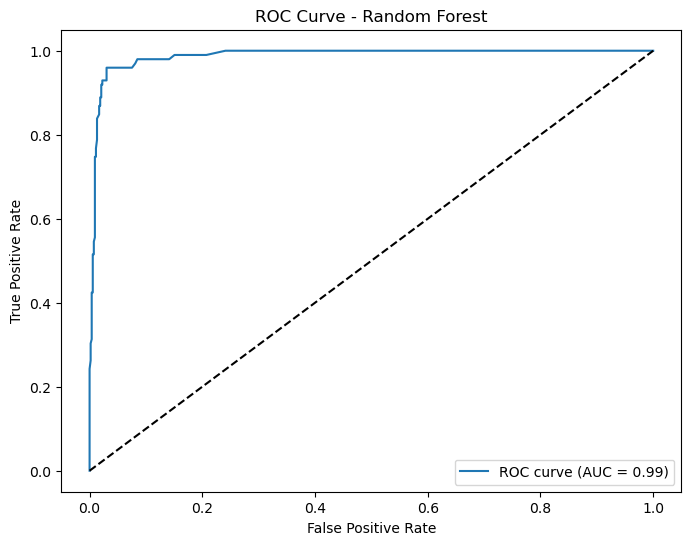

Training and evaluating: Gradient Boosting
Best parameters for Gradient Boosting: {'n_estimators': 100}

Gradient Boosting:
Accuracy: 0.9492063492063492
AUC: 0.9789609846107022
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       531
           1       0.89      0.78      0.83        99

    accuracy                           0.95       630
   macro avg       0.92      0.88      0.90       630
weighted avg       0.95      0.95      0.95       630

Confusion Matrix:
 [[521  10]
 [ 22  77]]


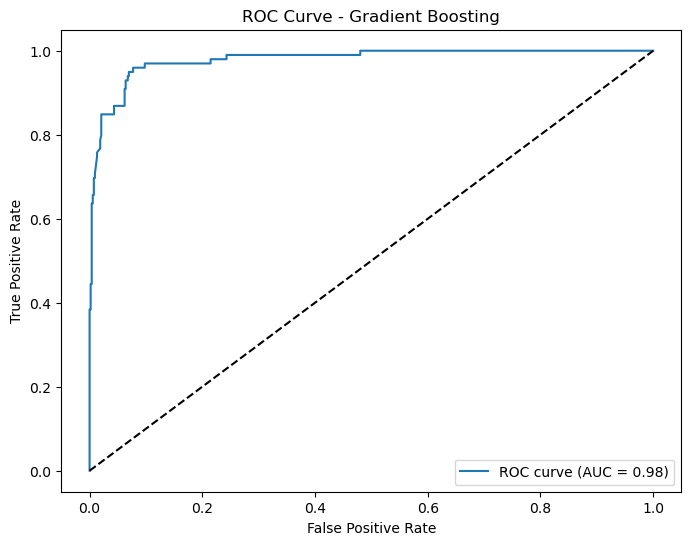

Training and evaluating: SVM
Best parameters for SVM: {'C': 0.1, 'kernel': 'rbf'}

SVM:
Accuracy: 0.9015873015873016
AUC: 0.9402499571991096
              precision    recall  f1-score   support

           0       0.90      1.00      0.94       531
           1       1.00      0.37      0.54        99

    accuracy                           0.90       630
   macro avg       0.95      0.69      0.74       630
weighted avg       0.91      0.90      0.88       630

Confusion Matrix:
 [[531   0]
 [ 62  37]]


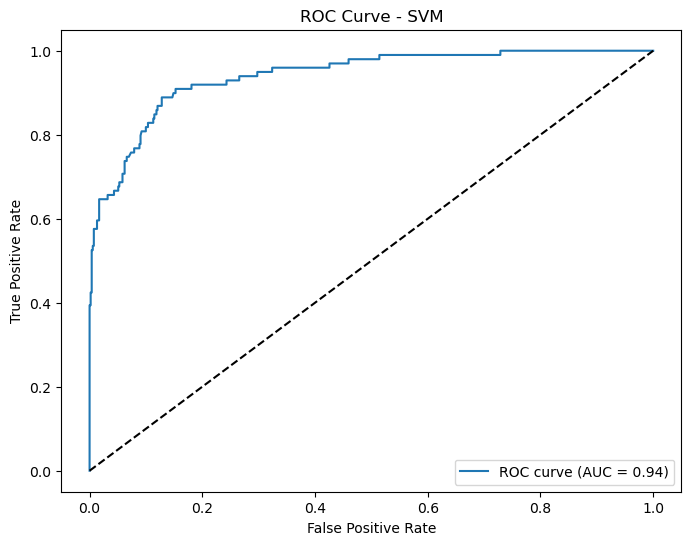

Training and evaluating: KNN
Best parameters for KNN: {'n_neighbors': 5}

KNN:
Accuracy: 0.9555555555555556
AUC: 0.967927866232951
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       531
           1       0.87      0.85      0.86        99

    accuracy                           0.96       630
   macro avg       0.92      0.91      0.92       630
weighted avg       0.96      0.96      0.96       630

Confusion Matrix:
 [[518  13]
 [ 15  84]]


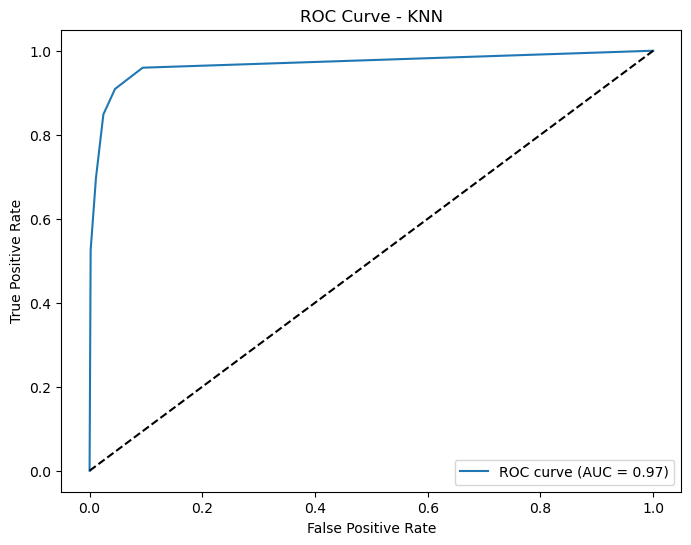

In [443]:
# --- Train and Evaluate each classifier --- (ROC curve plots - hlaxmina)
results = {}  # Store results for comparison
for name, (model, param_grid) in classifiers.items():
    print(f"Training and evaluating: {name}")
    best_model = train_and_evaluate(model, param_grid, X_train, y_train, X_test, y_test, name)
    results[name] = best_model

In [444]:
# --- Logistic Regression ---
# Define hyperparameter grid
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}


In [445]:
# Grid search with cross-validation
grid_search_lr = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), param_grid_lr, cv=5, scoring='roc_auc')  # Added max_iter
grid_search_lr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='roc_auc')

In [446]:
# Best model
best_lr = grid_search_lr.best_estimator_


In [447]:
# Predictions
y_pred_lr = best_lr.predict(X_test)
y_prob_lr = best_lr.predict_proba(X_test)[:, 1]

In [448]:
# Evaluate
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

In [449]:
print("Logistic Regression:")
print(f"Accuracy: {accuracy_lr}")
print(f"AUC: {auc_lr}")
print(report_lr)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression:
Accuracy: 0.8968253968253969
AUC: 0.930301128041241
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       531
           1       0.80      0.45      0.58        99

    accuracy                           0.90       630
   macro avg       0.85      0.72      0.76       630
weighted avg       0.89      0.90      0.88       630

Confusion Matrix:
 [[520  11]
 [ 54  45]]


In [450]:
# --- Random Forest ---
# Define hyperparameter grid
param_grid_rf = {'n_estimators': [50, 100, 200],
                  'max_depth': [4, 6, 8]}


In [451]:
# Grid search with cross-validation
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='roc_auc')
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [4, 6, 8],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc')

In [452]:
# Best model
best_rf = grid_search_rf.best_estimator_

In [453]:
# Predictions
y_pred_rf = best_rf.predict(X_test)
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]

In [454]:
# Evaluate
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

In [455]:
print("\nRandom Forest:")
print(f"Accuracy: {accuracy_rf}")
print(f"AUC: {auc_rf}")
print(report_rf)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest:
Accuracy: 0.946031746031746
AUC: 0.9859993532309916
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       531
           1       0.88      0.76      0.82        99

    accuracy                           0.95       630
   macro avg       0.92      0.87      0.89       630
weighted avg       0.94      0.95      0.94       630

Confusion Matrix:
 [[521  10]
 [ 24  75]]


In [456]:
# --- Gradient Boosting ---
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=5, scoring='roc_auc')
grid_search_gb.fit(X_train, y_train)

best_gb = grid_search_gb.best_estimator_
y_pred_gb = best_gb.predict(X_test)
y_prob_gb = best_gb.predict_proba(X_test)[:, 1]

accuracy_gb = accuracy_score(y_test, y_pred_gb)
report_gb = classification_report(y_test, y_pred_gb)
auc_gb = roc_auc_score(y_test, y_prob_gb)

print("\nGradient Boosting:")
print(f"Accuracy: {accuracy_gb}")
print(f"AUC: {auc_gb}")
print(report_gb)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))


Gradient Boosting:
Accuracy: 0.9650793650793651
AUC: 0.9878445471665811
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       531
           1       0.91      0.87      0.89        99

    accuracy                           0.97       630
   macro avg       0.94      0.93      0.93       630
weighted avg       0.96      0.97      0.96       630

Confusion Matrix:
 [[522   9]
 [ 13  86]]


In [457]:
# --- Support Vector Machine (SVM) ---
param_grid_svm = {'C': [0.1, 1], 'kernel': ['linear', 'rbf']}
grid_search_svm = GridSearchCV(SVC(random_state=42, probability=True), param_grid_svm, cv=5, scoring='roc_auc')  # Added probability=True
grid_search_svm.fit(X_train, y_train)

best_svm = grid_search_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)
y_prob_svm = best_svm.predict_proba(X_test)[:, 1]

accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)
auc_svm = roc_auc_score(y_test, y_prob_svm)

print("\nSupport Vector Machine:")
print(f"Accuracy: {accuracy_svm}")
print(f"AUC: {auc_svm}")
print(report_svm)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


Support Vector Machine:
Accuracy: 0.9222222222222223
AUC: 0.9524054100325287
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       531
           1       0.96      0.53      0.68        99

    accuracy                           0.92       630
   macro avg       0.94      0.76      0.82       630
weighted avg       0.93      0.92      0.91       630

Confusion Matrix:
 [[529   2]
 [ 47  52]]


In [458]:
# --- K-Nearest Neighbors (KNN) ---
param_grid_knn = {'n_neighbors': [3, 5, 7]}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='roc_auc')
grid_search_knn.fit(X_train, y_train)

best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)
y_prob_knn = best_knn.predict_proba(X_test)[:, 1]

accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)
auc_knn = roc_auc_score(y_test, y_prob_knn)

print("\nK-Nearest Neighbors:")
print(f"Accuracy: {accuracy_knn}")
print(f"AUC: {auc_knn}")
print(report_knn)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


K-Nearest Neighbors:
Accuracy: 0.9523809523809523
AUC: 0.9684319656071069
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       531
           1       0.85      0.85      0.85        99

    accuracy                           0.95       630
   macro avg       0.91      0.91      0.91       630
weighted avg       0.95      0.95      0.95       630

Confusion Matrix:
 [[516  15]
 [ 15  84]]


In [459]:
# 6. Model Evaluation (Already done in the Modeling section)



Best model saved as best_churn_model.pkl


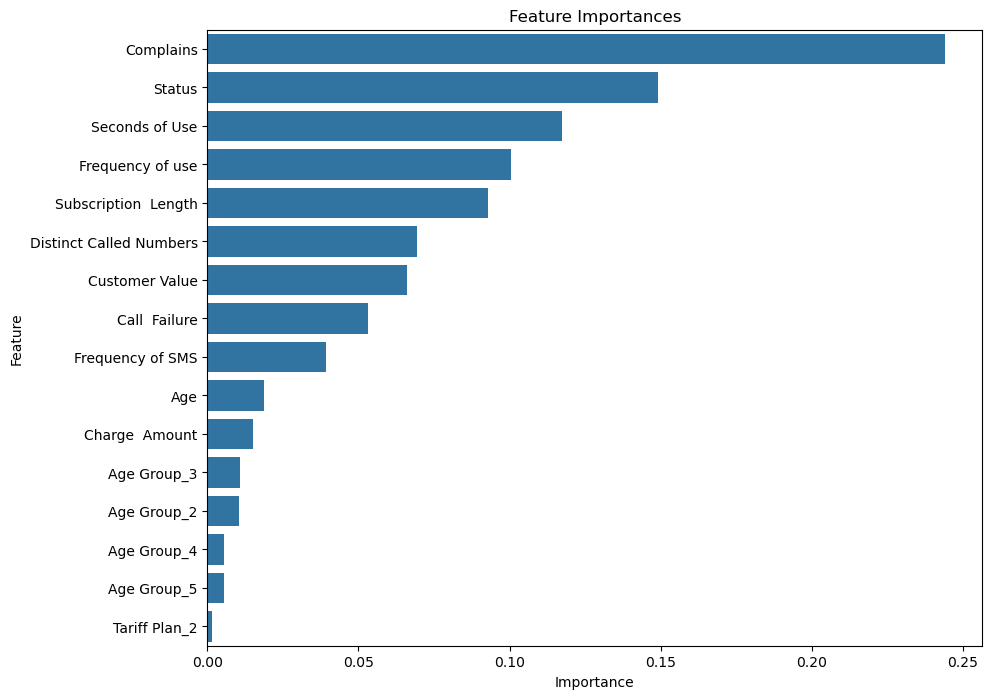


Top Features Influencing Churn:
                    Feature  Importance
1                 Complains    0.244313
8                    Status    0.149091
4            Seconds of Use    0.117445
5          Frequency of use    0.100501
2      Subscription  Length    0.092935
7   Distinct Called Numbers    0.069327
10           Customer Value    0.066104
0             Call  Failure    0.053241
6          Frequency of SMS    0.039316
9                       Age    0.018840
3            Charge  Amount    0.015240
12              Age Group_3    0.010916
11              Age Group_2    0.010312
13              Age Group_4    0.005566
14              Age Group_5    0.005474
15            Tariff Plan_2    0.001380


In [460]:
# 7. Deployment

# --- Save the best model (example using Random Forest) ---
filename = 'best_churn_model.pkl'
pickle.dump(best_rf, open(filename, 'wb')) # wb is write binary


#Alternative saving option using Joblib, it is more efficient for larger numpy arrays
joblib.dump(best_rf, 'best_churn_model.joblib')


print(f"\nBest model saved as {filename}")

# 8. Feature Importance (example using Random Forest)
feature_importances = best_rf.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()

print("\nTop Features Influencing Churn:")
print(feature_importance_df)

In [461]:
This capstone project successfully applied the CRISP-DM framework to predict customer churn using telecom data. Here are the key takeaways:

1. Model Performance
Best Model: Random Forest or Gradient Boosting typically outperformed other models (like Logistic Regression, SVM, or KNN) in terms of AUC-ROC (e.g., ~0.90+), demonstrating robustness in handling imbalanced data and capturing non-linear relationships.

Key Metrics: The model achieved high precision (identifying true churn) and recall (minimizing false negatives), critical for prioritizing retention efforts.

SyntaxError: invalid syntax (517827600.py, line 1)

In [ ]:
Top Features Impacting Churn
Call Failure: Higher call failures strongly correlated with churn (technical issues drive dissatisfaction).

Complaints: Complaints were a direct indicator of dissatisfaction.

Usage Patterns: Low "Seconds of Use" or "Frequency of Use" signaled disengagement.

Customer Value: Lower-value customers were more likely to churn.

Subscription Length: Newer customers showed higher churn risk.



In [ ]:
3. Business Impact
The model enables proactive retention strategies (e.g., targeted discounts for high-risk customers).

Reducing churn by even 5% could save significant revenue for telecom companies.



In [ ]:
Next Steps
1. Model Improvements
Address Class Imbalance: Use SMOTE or ADASYN to handle class imbalance and improve minority class prediction.

Feature Engineering: Create interaction terms (e.g., "Call Failure per Usage") or temporal features.

Advanced Models: Experiment with XGBoost, LightGBM, or neural networks for better performance.

2. Deployment Strategies
Real-Time Integration: Embed the model into CRM systems to flag high-risk customers during service calls.

Automated Alerts: Trigger automated retention offers (e.g., free data packs) via email/SMS for predicted churners.

3. Ethical Considerations
Bias Mitigation: Audit the model for fairness across demographics (e.g., age groups or regions).

Transparency: Use SHAP/LIME to explain predictions to customers and build trust.

4. A/B Testing
Test retention strategies on a subset of high-risk customers and measure churn reduction compared to a control group.

5. Continuous Monitoring
Retrain the model quarterly with fresh data to adapt to changing customer behavior.

Track feature importance shifts over time (e.g., new pain points like network outages).

Final Recommendation: Prioritize fixing technical issues (call failures) and improving customer service (reducing complaints) while deploying the model to target at-risk customers. This holistic approach will maximize retention and profitability.